In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
import random
import statsmodels.api as sm
from scipy import stats
import matplotlib.pyplot as plt 
import seaborn as sns
import statsmodels.api as sa
import statsmodels.formula.api as smf
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [32]:
# Simulación de datos
rng = np.random.RandomState(5)
variable = rng.normal(10,2.3, size = 90)*rng.uniform(2,16,90)
random.seed(5)
grupo = np.repeat(["G1","G2","G3"],30)
df = {'variable': variable, 'grupo': grupo,"id":np.arange(1,91)}
df=pd.DataFrame(df)
df.groupby("grupo")["variable"].describe()

,count,mean,std,min,25%,50%,75%,max
grupo,,,,,,,,
G1,30.0,85.213579,46.228226,22.837460,45.478148,78.126606,122.990198,221.355898
G2,30.0,99.634674,40.398180,27.110290,73.164619,98.192242,120.968043,183.716499
G3,30.0,88.758915,42.478921,19.309129,50.693623,88.675529,119.922941,170.018509


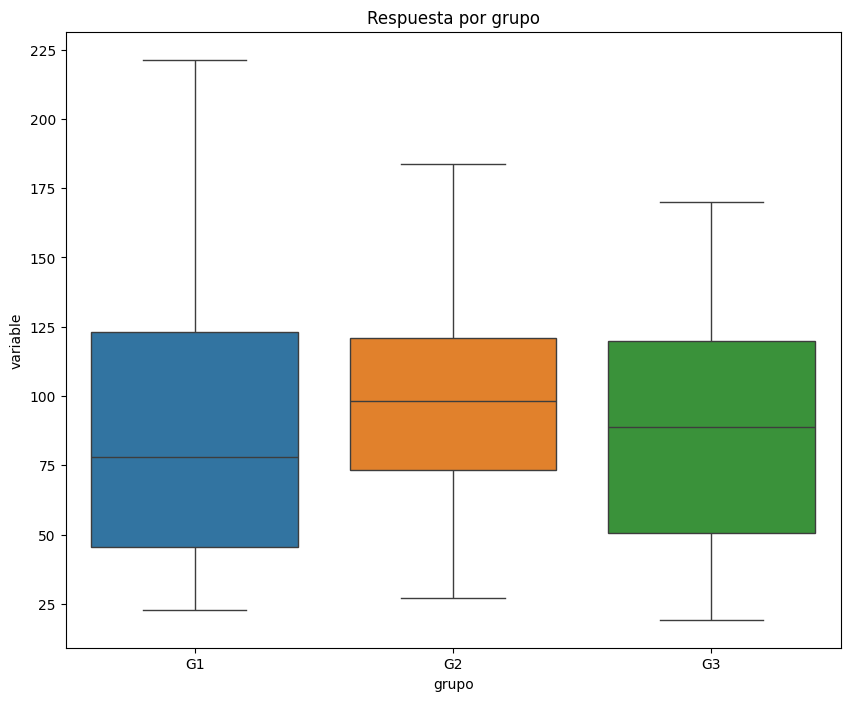

In [33]:
plt.figure(figsize=(10,8))
sns.boxplot(x=df["grupo"],y=df["variable"],data=df, order=["G1","G2","G3"],
            hue="grupo",legend=False)
plt.title("Respuesta por grupo")
plt.show()

In [34]:
# anova un factor
mod = smf.ols('variable ~ grupo', data = df).fit()
anova=sa.stats.anova_lm(mod)
print(anova)


            df         sum_sq      mean_sq         F   PR(>F)
grupo      2.0    3388.195457  1694.097728  0.911864  0.40558
Residual  87.0  161632.096044  1857.840184       NaN      NaN


In [35]:
# Supuestos
predichos = mod.predict()
predichos
residuos = df['variable'] - predichos

# normalidad
stats.shapiro(residuos)

ShapiroResult(statistic=0.9753260793381393, pvalue=0.08438223844462409)

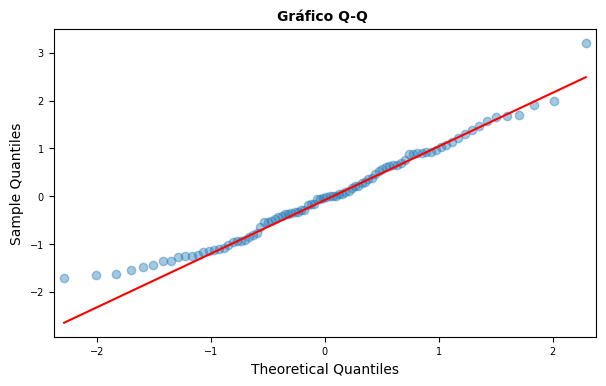

In [36]:
# qq plot
fig, ax = plt.subplots(figsize=(7,4))
sm.qqplot(
    residuos,
    fit   = True,
    line  = 'q',
    alpha = 0.4,
    lw    = 2,
    ax    = ax
)
ax.set_title('Gráfico Q-Q ', fontsize = 10,
             fontweight = "bold")
ax.tick_params(labelsize = 7)

In [37]:
stats.bartlett(df[df['grupo'] == 'G1']['variable'],
               df[df['grupo'] == 'G2']['variable'],
               df[df['grupo'] == 'G3']['variable'])


BartlettResult(statistic=0.5353469189311159, pvalue=0.7651575952835125)

In [38]:
print(pairwise_tukeyhsd(endog = df ['variable'],
                          groups = df['grupo'],
                          alpha = 0.05 ))

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
    G1     G2  14.4211 0.4014 -12.1159 40.9581  False
    G1     G3   3.5453 0.9456 -22.9917 30.0824  False
    G2     G3 -10.8758 0.5931 -37.4128 15.6613  False
-----------------------------------------------------
